### Loading the data

In [1]:
from dataset import Dataset

dataset = Dataset()
dataset.call()
dataset.inspect()

X_train shape: (14208, 64, 64, 3)
14208 train samples
3552 test samples
8792 images of vehicles
8968 images of non vehicles


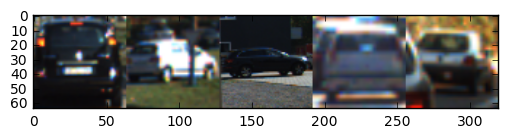

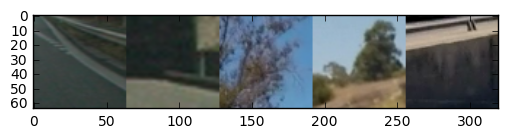

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random

%matplotlib inline

cars_images = []
non_cars_images = []

for i in range(5):
    cars_images.append(mpimg.imread(random.choice(dataset.cars)))

cars_images = np.concatenate(cars_images, axis=1)
plt.imshow(cars_images)
plt.show()

for i in range(5):
    non_cars_images.append(mpimg.imread(random.choice(dataset.non_cars)))

non_cars_images = np.concatenate(non_cars_images, axis=1)
plt.imshow(non_cars_images)
plt.show()


In [4]:
from hog_classifier import *

In [3]:
cla = HOGClassifier(dataset)

In [5]:
cla.extract_data_features()

88.0 Seconds to extract HOG features...
Feature vectors shape: (17760, 8460)


In [6]:
cla.scale_features()
cla.get_labels()
cla.split_up_data()

Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 8460


In [7]:
cla.train()

8.23 Seconds to train SVC...


In [8]:
cla.accuracy()

Test Accuracy of SVC =  0.9899


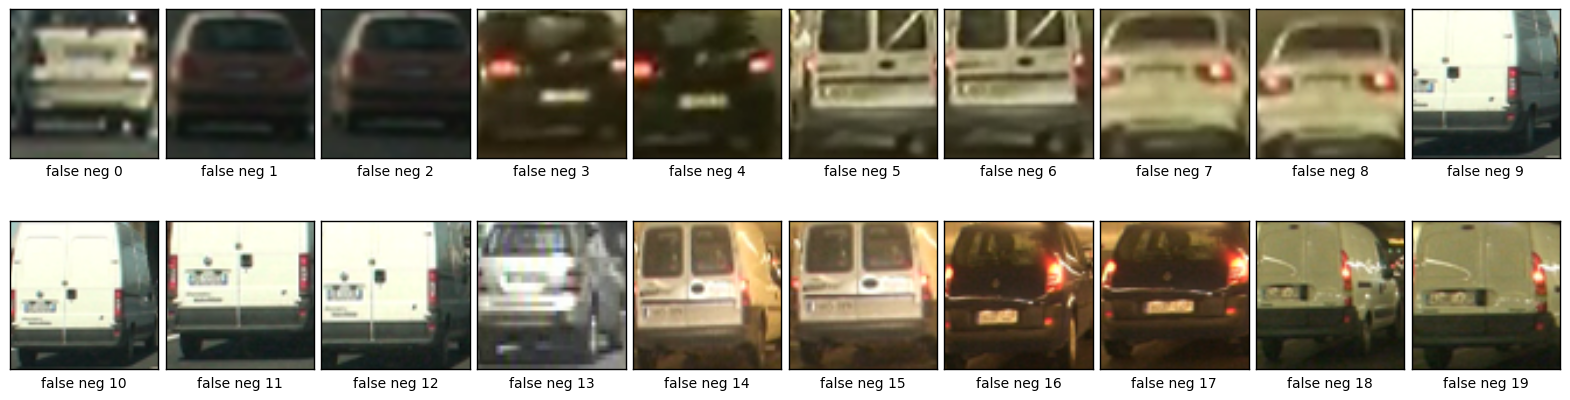

number of misclassified car images 38


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

cars_nval = len(cla.car_features)

preds = cla.svc.predict(cla.car_features)
misclassifieds = np.array(preds != np.ones(cars_nval))
inds = np.where(preds != np.ones(cars_nval))
inds = np.ravel(inds)
misclassifieds = [ dataset.cars[i] for i in inds]
    
fig, axes = plt.subplots(2,10,figsize=(20,5))
fig.subplots_adjust(hspace=0.2, wspace=0.05)
    
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(misclassifieds[i]))
    xlabel = "false neg {0}".format(i)
    ax.set_xlabel(xlabel)
    ax.set_xticks([])
    ax.set_yticks([])
    

plt.show()
print('number of misclassified car images',len(misclassifieds))

In [63]:
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler

# from windows_search import *

# images = sorted(glob.glob('assets/out*.png'))


class WindowsSearch():

    def __init__(self, classifier):
        self.classifier   = classifier

        self.X_start_stop = [[None,None],[None,None],[None,None],[None,None]]
        self.XY_window    = [(240, 240), (180, 180), (120, 120), (70, 70)]
        self.XY_overlap   = [(0.75, 0.75), (0.75, 0.75), (0.75, 0.75), (0.75, 0.75)]
        self.Y_start_stop = [[380, 500.0], [380, 470.0], [395, 455.0], [405, 440.0]]
        
        self.scaler       = StandardScaler().fit(classifier.hog_features)


    def search_all_frames(self, image):
        hot_windows = []
        all_windows = []

        for i in range(len(self.Y_start_stop)):
            windows = slide_window(image,
                        x_start_stop=self.X_start_stop[i],
                        y_start_stop=self.Y_start_stop[i],
                        xy_window=self.XY_window[i],
                        xy_overlap=self.XY_overlap[i])

            all_windows += [windows]

            hot_windows +=  search_windows(image, windows,
                    self.classifier.svc,
                    self.scaler,
                    color_space=self.classifier.color_space,
                    spatial_size=self.classifier.spatial_size,
                    hist_bins=self.classifier.hist_bins,
                    orient=self.classifier.orient,
                    pix_per_cell=self.classifier.pix_per_cell,
                    cell_per_block=self.classifier.cell_per_block,
                    hog_channel=self.classifier.hog_channel,
                    spatial_feat=self.classifier.spatial_feat,
                    hist_feat=self.classifier.hist_feat,
                    hog_feat=self.classifier.hog_feat)

        return hot_windows,all_windows


ws = WindowsSearch(cla)

image = mpimg.imread("test_images/test4.jpg")
draw_image = np.copy(image)

hot_windows,all_windows = ws.search_all_frames(image)

MemoryError: 

In [58]:
print(len(cla.hog_features))


17760
